<a href="https://colab.research.google.com/github/nitin-khandagale/machine_learning_practice/blob/master/linear_regression_multiple_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('ex1data2.txt', header=None)

In [ ]:
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
x = df.drop(2,axis='columns')
y = df[2]

In [ ]:
x = (x - np.mean(x)) / np.std(x)

In [ ]:
m = x.shape[0]
m

47

In [ ]:
ones = np.ones((m,1))

In [ ]:
x = np.hstack((ones,x))
y = y[:,np.newaxis]

In [ ]:
learning_rate = 0.01
theta = np.zeros((3,1))

In [ ]:
def cost_function(x,y,theta):
  temp = np.dot(x, theta) - y
  ans = (1/(2*m)) * np.sum( np.power(temp, 2) )

  return ans

In [ ]:
cost = cost_function(x,y,theta)
cost

65591548106.45744

In [ ]:
cost_summary = []
iter_history = []
iterations = 500

In [ ]:


def gradient_descent(x,y,theta, learning_rate, iterations):
  for i in range(iterations):
    temp = np.dot(x, theta) - y
    temp = np.dot(x.T, temp)
    theta = theta - (learning_rate/m) * temp
    z = cost_function(x,y,theta)
    cost_summary.append(z)
    iter_history.append(i)
  return theta , cost_summary , iter_history

In [ ]:
new_theta = gradient_descent(x,y,theta,learning_rate,iterations)

In [ ]:
new_theta[0]

array([[ 3.38175984e+05],
       [ 1.03032124e+05],
       [-2.02325233e+02]])

In [ ]:
cost = cost_function(x,y,new_theta[0])
cost

2063782403.6748846

Text(0, 0.5, 'Cost')

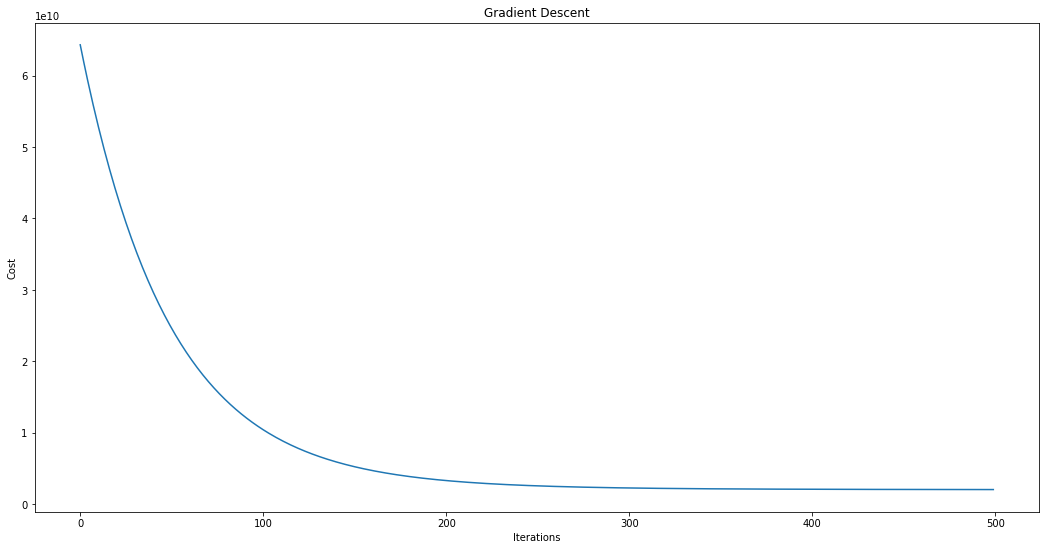

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(iter_history, cost_summary)
plt.title('Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost')